In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from linear_model_MOM import blockMOM, MOM

#### Test linearity MOM with block fixed

In [3]:
K=10

In [4]:
def sample(M,K):
    res=[]
    for i in range(M):
        print('\r',i,end='')

        # Creation of dependent sample
        X=np.random.rand(1000)
        Y=X**2
        blocks=blockMOM(K,range(1000))
        res+=[[MOM(Y-X,blocks)[0],MOM(Y,blocks)[0],MOM(X,blocks)[0]]]
    return res

In [5]:
result=sample(500,K)

 499

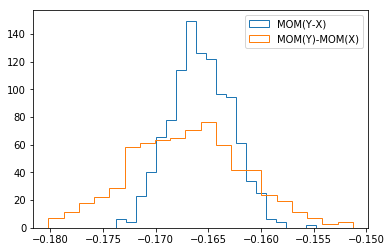

In [6]:
from matplotlib import pyplot as plt
result=np.array(result)
plt.hist(result[:,0],histtype='step',label='MOM(Y-X)',normed=True,bins=20)
plt.hist(result[:,1]-result[:,2],histtype='step',label='MOM(Y)-MOM(X)',normed=True,bins=20)
plt.legend()
plt.show()

#### Test linearity $E_{\sigma}[MOM]$ using monte carlo

In [7]:
def sample(M,K):
    res=[]
    for i in range(M):
        if i%50==0:
            print('\r',i,end='')
        # Creation of dependent sample
        X=np.random.rand(1000)
        Y=X**2
        resmc=[0,0,0]
        for f in range(1000):
            blocks=blockMOM(K,range(1000))
            resmc[0]+=MOM(Y-X,blocks)[0]
            resmc[1]+=MOM(Y,blocks)[0]
            resmc[2]+=MOM(X,blocks)[0]
        resmc=np.array(resmc)/1000
        res+=[resmc]
    return res

In [ ]:
result=sample(500,K)

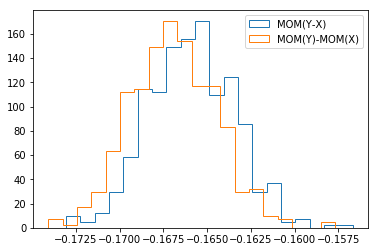

In [10]:
from matplotlib import pyplot as plt
result=np.array(result)
plt.hist(result[:,0],histtype='step',label='MOM(Y-X)',normed=True,bins=20)
plt.hist(result[:,1]-result[:,2],histtype='step',label='MOM(Y)-MOM(X)',normed=True,bins=20)
plt.legend()
plt.show()

In [ ]:
### Disparity caused by the Monte Carlo estimation of $E_{\sigma}[MOM]$, as we increase